In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [4]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Load data from Google Drive
import pandas as pd
file_path = '/content/drive/MyDrive/AML Project/HI-Small_Trans.csv'
df = pd.read_csv(file_path)

# Configure plotly and pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)

# Check data
print(df.head(5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          Timestamp  From Bank    Account  To Bank  Account.1  Amount Received Receiving Currency  Amount Paid Payment Currency Payment Format  Is Laundering
0  2022/09/01 00:20         10  8000EBD30       10  8000EBD30          3697.34          US Dollar      3697.34        US Dollar   Reinvestment              0
1  2022/09/01 00:20       3208  8000F4580        1  8000F5340             0.01          US Dollar         0.01        US Dollar         Cheque              0
2  2022/09/01 00:00       3209  8000F4670     3209  8000F4670         14675.57          US Dollar     14675.57        US Dollar   Reinvestment              0
3  2022/09/01 00:02         12  8000F5030       12  8000F5030          2806.97          US Dollar      2806.97        US Dollar   Reinvestment              0
4  2022/09/01 00:06         10  8000F5200       10  8000F5200         36682.97   

In [6]:
df.shape

(5078345, 11)

In [7]:
df.isna().sum()

,0
Timestamp,0
From Bank,0
Account,0
To Bank,0
Account.1,0
Amount Received,0
Receiving Currency,0
Amount Paid,0
Payment Currency,0
Payment Format,0


**Check for Duplicates**

In [8]:
df.duplicated().sum()

9

In [9]:
df.drop_duplicates(inplace=True)

**Check if the two columns are equal**

In [10]:
result = (df["Amount Received"] == df["Amount Paid"]).all()
print(result)

False


In [11]:
result = (df["Receiving Currency"] == df["Payment Currency"]).all()
print(result)

False


In [12]:
result = set(df["Receiving Currency"].unique()) ==set(df["Payment Currency"].unique())
print(result)

True


**Check the dataset is balanced or not**

In [13]:
df["Is Laundering"].unique()

array([0, 1])

In [14]:
df["Is Laundering"].value_counts()

,count
Is Laundering,
0,5073159
1,5177


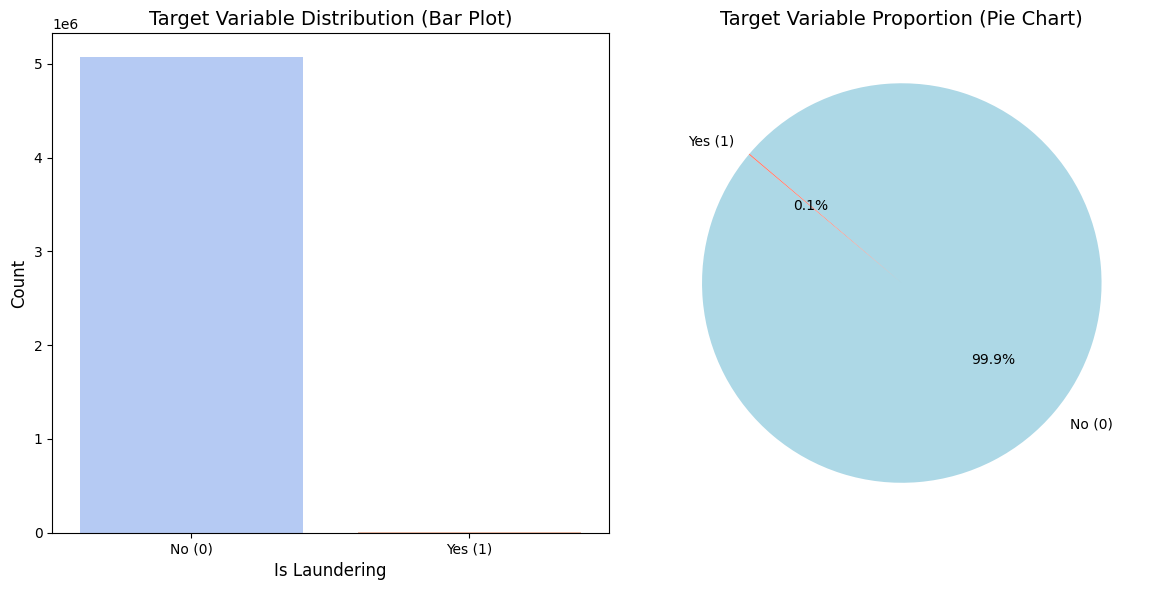

In [15]:
# Check the distribution of the target variable
target_count = df["Is Laundering"].value_counts()

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot
sns.barplot(x=target_count.index, y=target_count.values, ax=axes[0], palette="coolwarm")
axes[0].set_title('Target Variable Distribution (Bar Plot)', fontsize=14)
axes[0].set_xlabel('Is Laundering', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticks(target_count.index)
axes[0].set_xticklabels(['No (0)', 'Yes (1)'])

# Pie chart
axes[1].pie(target_count.values, labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])
axes[1].set_title('Target Variable Proportion (Pie Chart)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

   From Bank    Account  To Bank  Account.1  Amount Received Receiving Currency  Amount Paid Payment Currency Payment Format  Is Laundering        Date       Day      Time
0         10  8000EBD30       10  8000EBD30          3697.34          US Dollar      3697.34        US Dollar   Reinvestment              0  2022-09-01  Thursday  00:20:00


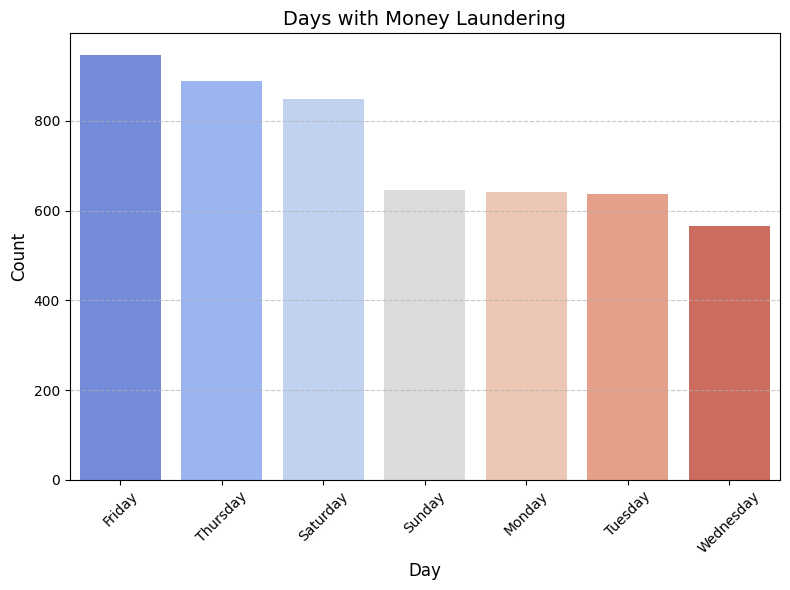

Chi-Square Test for 'Day':
There is a significant relationship (p-value = 0.0 )

Chi-Square Test for 'Date':
There is a significant relationship (p-value = 0.0 )

Chi-Square Test for 'Time':
There is a significant relationship (p-value = 0.0 )


In [16]:
# Convert the "Timestamp" column to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Extract Date, Day, and Time from the Timestamp
df["Date"] = df["Timestamp"].dt.date
df["Day"] = df["Timestamp"].dt.day_name()
df["Time"] = df["Timestamp"].dt.time

# Drop the original "Timestamp" column
df.drop(columns=["Timestamp"], inplace=True)

# Display the updated dataframe
print(df.head(1))

# Visualize days with money laundering cases
plt.figure(figsize=(8, 6))
plt.title("Days with Money Laundering", fontsize=14)
laundering_days = df[df["Is Laundering"] == 1]["Day"].value_counts()
sns.barplot(x=laundering_days.index, y=laundering_days.values, palette="coolwarm")
plt.xlabel("Day", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Chi-Square Tests for Relationships

# 1. Relationship between Money Laundering and Day
contingency_day = pd.crosstab(df['Is Laundering'], df['Day'])
chi2, p_day, dof, expected = st.chi2_contingency(contingency_day)
print("Chi-Square Test for 'Day':")
if p_day < 0.05:
    print("There is a significant relationship (p-value =", round(p_day, 4), ")")
else:
    print("No significant relationship (p-value =", round(p_day, 4), ")")

# 2. Relationship between Money Laundering and Date
contingency_date = pd.crosstab(df['Is Laundering'], df['Date'])
chi2, p_date, dof, expected = st.chi2_contingency(contingency_date)
print("\nChi-Square Test for 'Date':")
if p_date < 0.05:
    print("There is a significant relationship (p-value =", round(p_date, 4), ")")
else:
    print("No significant relationship (p-value =", round(p_date, 4), ")")

# 3. Relationship between Money Laundering and Time
contingency_time = pd.crosstab(df['Is Laundering'], df['Time'])
chi2, p_time, dof, expected = st.chi2_contingency(contingency_time)
print("\nChi-Square Test for 'Time':")
if p_time < 0.05:
    print("There is a significant relationship (p-value =", round(p_time, 4), ")")
else:
    print("No significant relationship (p-value =", round(p_time, 4), ")")

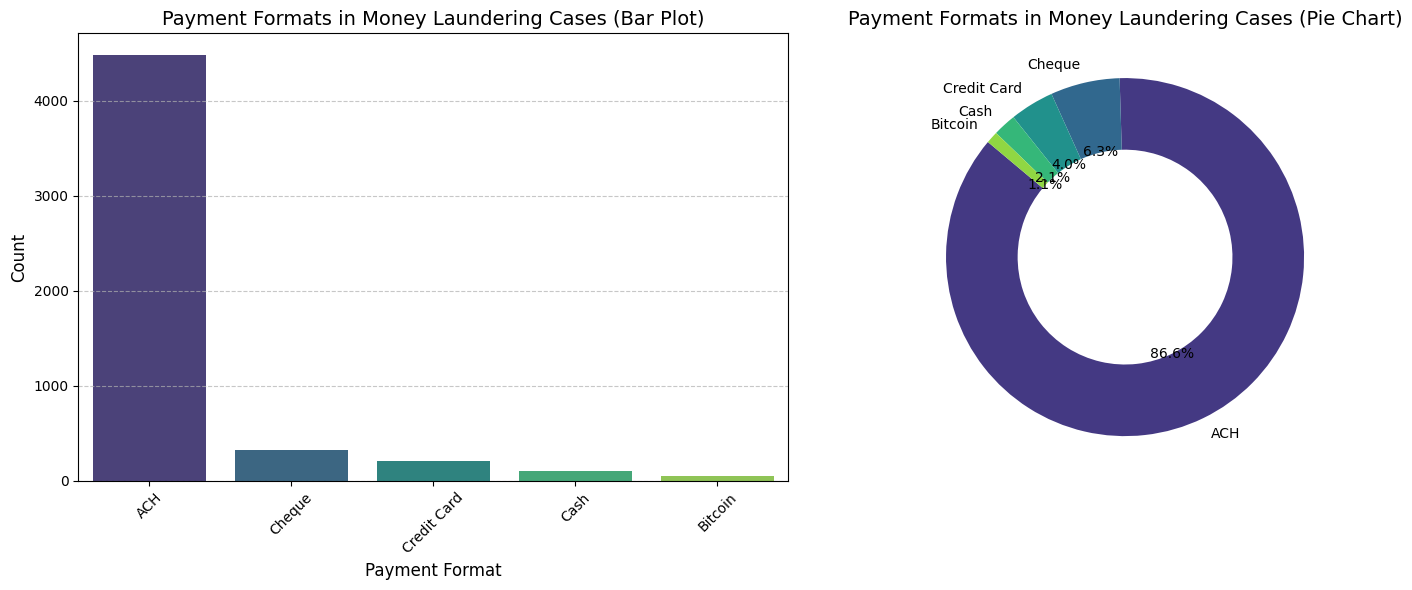

In [17]:
# Count payment formats for money laundering cases
payment_format = df[df["Is Laundering"] == 1]["Payment Format"].value_counts()

# Create the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar Plot
sns.barplot(x=payment_format.index, y=payment_format.values, ax=axes[0], palette="viridis")
axes[0].set_title('Payment Formats in Money Laundering Cases (Bar Plot)', fontsize=14)
axes[0].set_xlabel('Payment Format', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Pie Chart
axes[1].pie(payment_format.values, labels=payment_format.index, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette("viridis", len(payment_format)),
            wedgeprops=dict(width=0.4))
axes[1].set_title('Payment Formats in Money Laundering Cases (Pie Chart)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

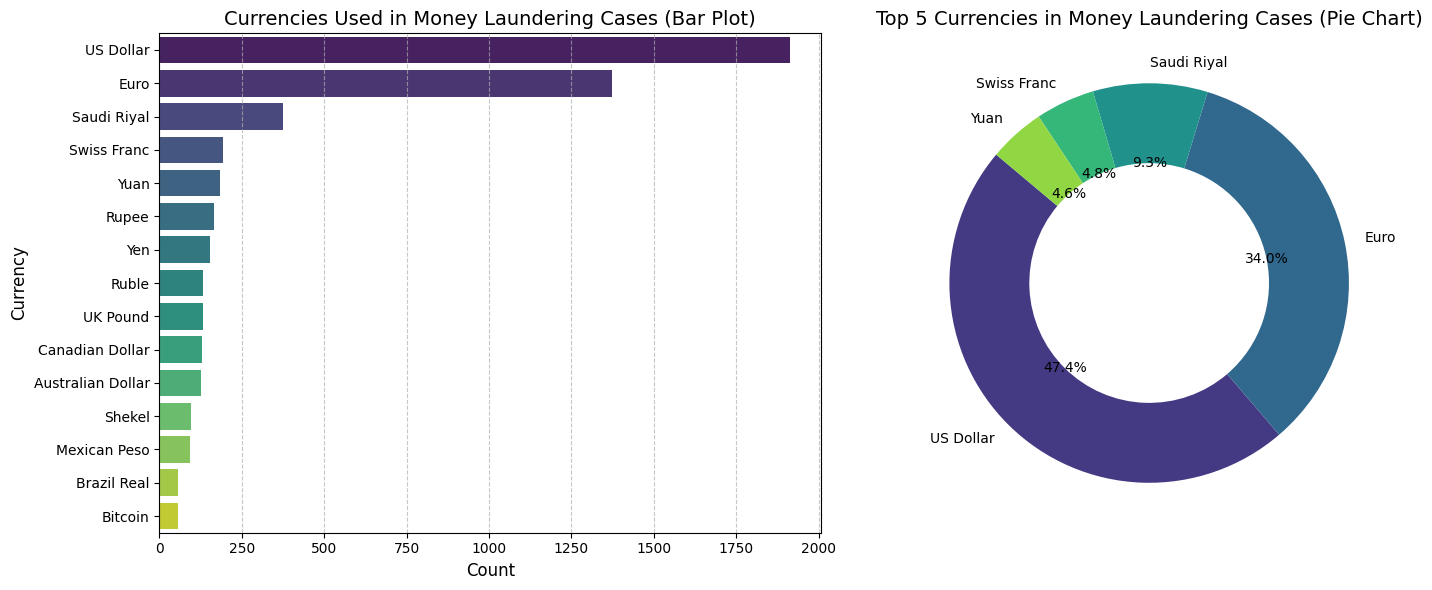

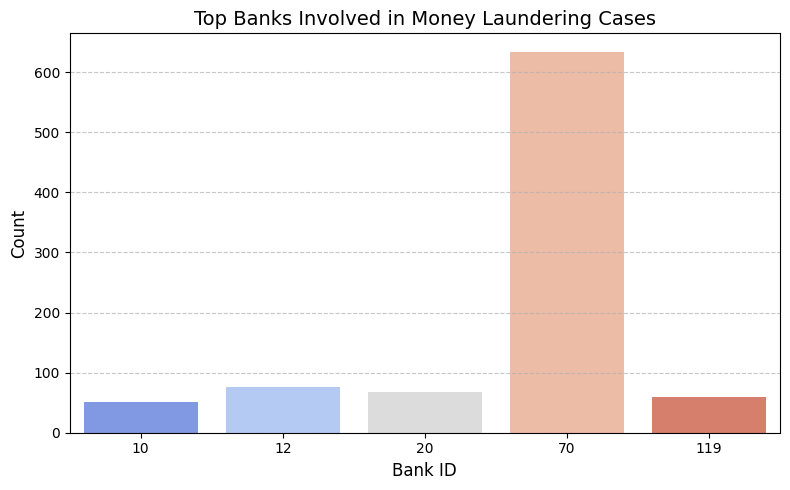

In [18]:
# Analyze currencies used in Money Laundering cases
currency = df[df["Is Laundering"] == 1]["Payment Currency"].value_counts()

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar Plot for Currency Distribution
sns.barplot(y=currency.index, x=currency.values, ax=axes[0], palette="viridis")
axes[0].set_title('Currencies Used in Money Laundering Cases (Bar Plot)', fontsize=14)
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Currency', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# Pie Chart for Top 5 Currencies
top_currencies = currency.head()
axes[1].pie(top_currencies.values, labels=top_currencies.index, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette("viridis", len(top_currencies)),
            wedgeprops=dict(width=0.4))
axes[1].set_title('Top 5 Currencies in Money Laundering Cases (Pie Chart)', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

# Analyze "From Bank" for Money Laundering cases
from_bank = df[df["Is Laundering"] == 1]["From Bank"].value_counts().head()

# Bar Plot for "From Bank"
plt.figure(figsize=(8, 5))
sns.barplot(x=from_bank.index, y=from_bank.values, palette="coolwarm")
plt.title('Top Banks Involved in Money Laundering Cases', fontsize=14)
plt.xlabel('Bank ID', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

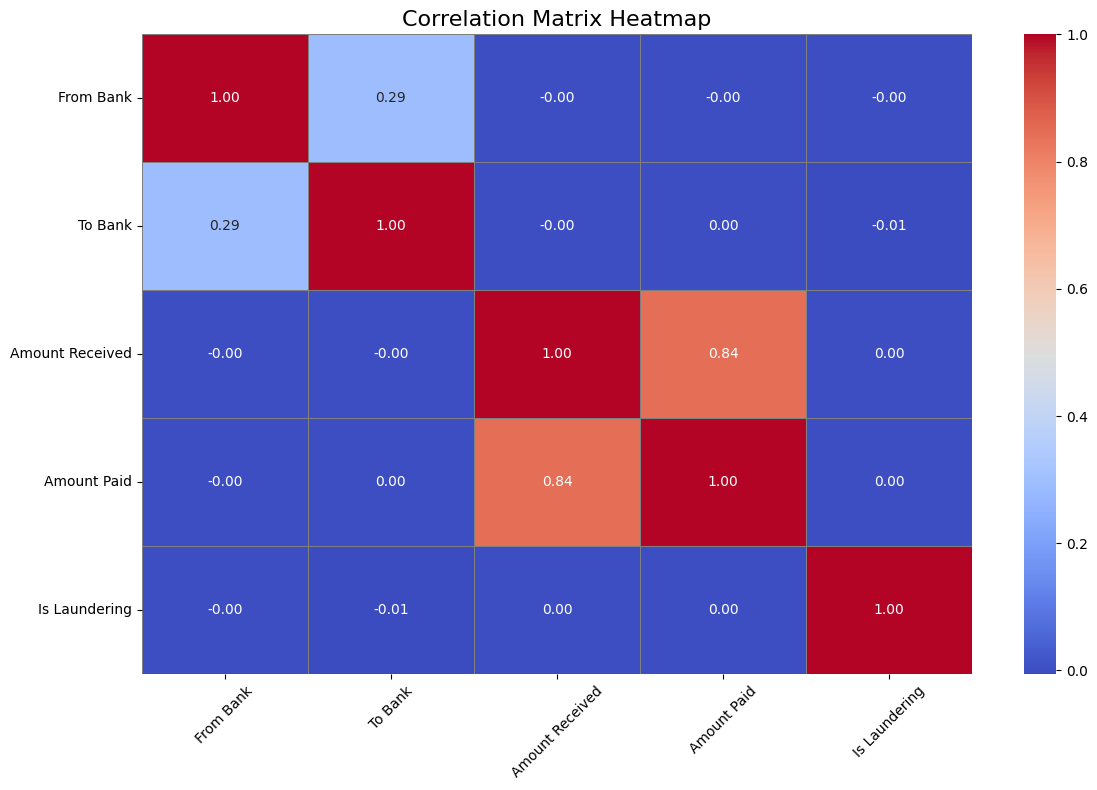

In [19]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')

# Add title and adjust layout
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

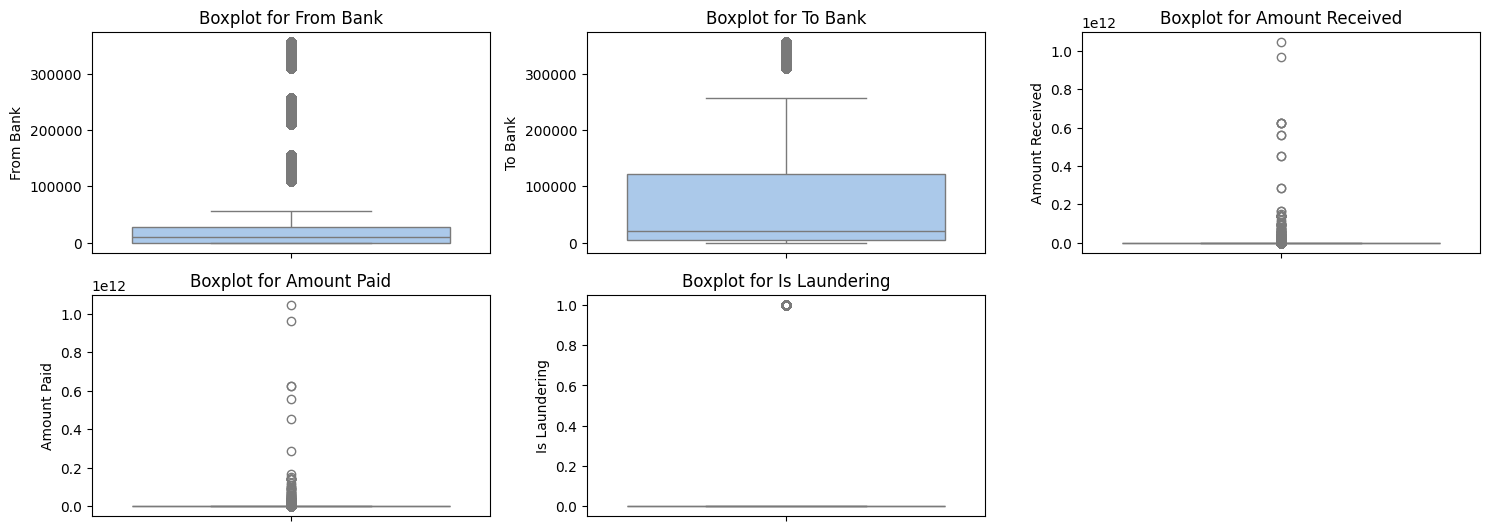

In [20]:
# Boxplot for Numerical Features
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col, palette="pastel")
    plt.title(f"Boxplot for {col}")
    plt.tight_layout()
plt.show()

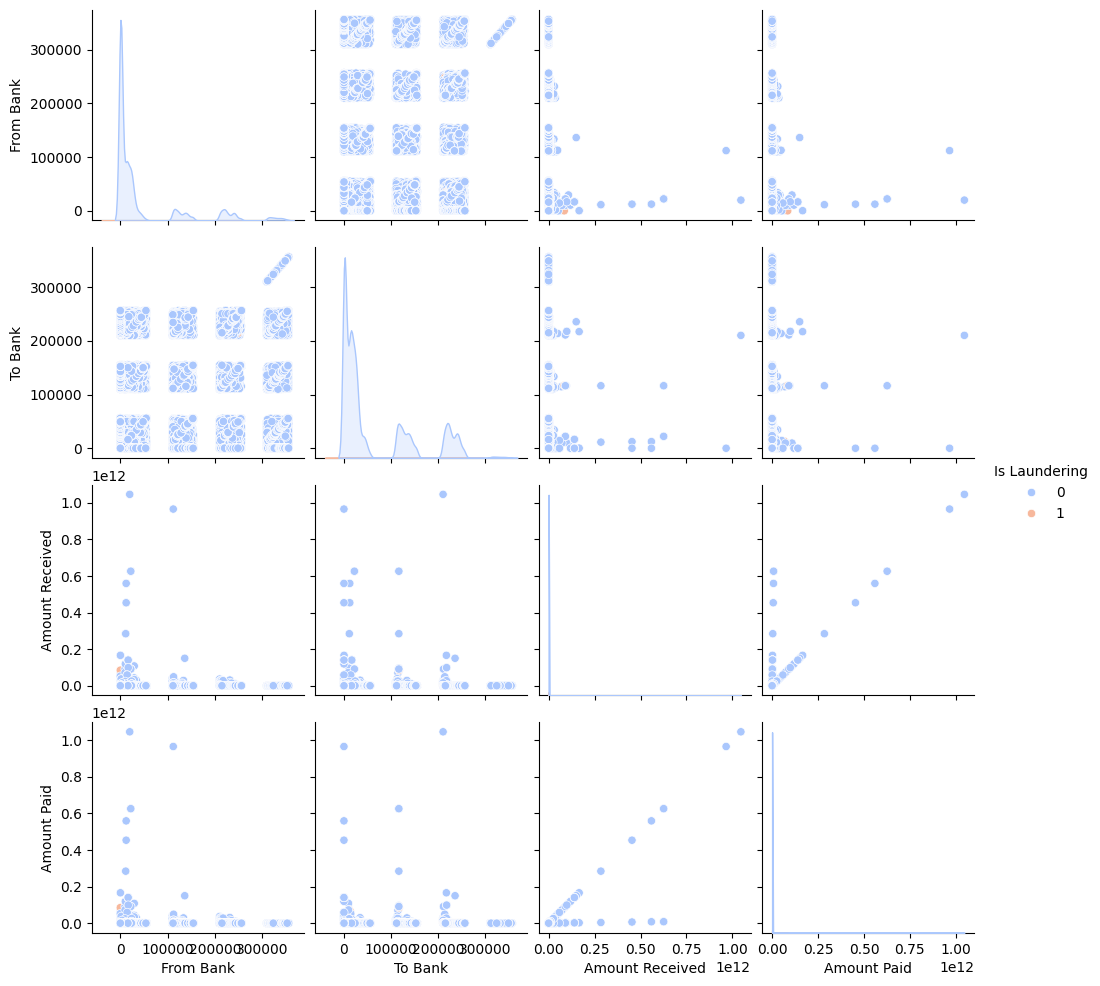

In [22]:
sns.pairplot(df, hue="Is Laundering", palette="coolwarm", diag_kind='kde')
plt.show()

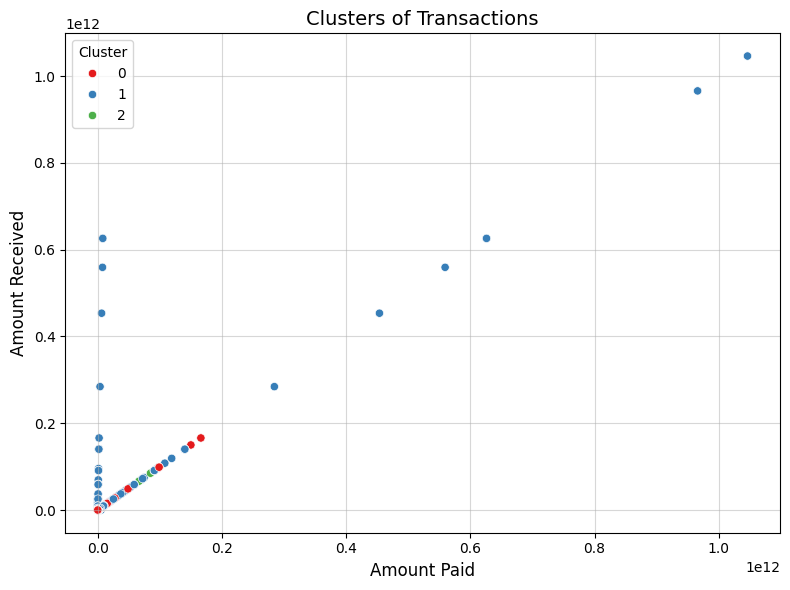

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to dataframe
df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Amount Paid'], y=df['Amount Received'], hue=df['Cluster'], palette="Set1")
plt.title('Clusters of Transactions', fontsize=14)
plt.xlabel('Amount Paid', fontsize=12)
plt.ylabel('Amount Received', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()